# CNN Implementation

## Import Library

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import sys
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, AveragePooling2D, 
                                   Flatten, Dense, Dropout)
from tensorflow.keras.optimizers import Adam
from typing import Dict, Any, Tuple, List

In [3]:
sys.path.append('../../src')
from cnn.cnn_from_scratch import CNNModel
from cnn.model_training import (
    load_and_preprocess_cifar10, 
    train_and_evaluate_model,
    plot_training_history
)

## Load Dataset

In [4]:
x_train, y_train, x_val, y_val, x_test, y_test = load_and_preprocess_cifar10()

Training set: (40000, 32, 32, 3), (40000,)
Validation set: (10000, 32, 32, 3), (10000,)
Test set: (10000, 32, 32, 3), (10000,)


In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"\nDataset shapes:")
print(f"Training: {x_train.shape}, {y_train.shape}")
print(f"Validation: {x_val.shape}, {y_val.shape}")
print(f"Test: {x_test.shape}, {y_test.shape}")


Dataset shapes:
Training: (40000, 32, 32, 3), (40000,)
Validation: (10000, 32, 32, 3), (10000,)
Test: (10000, 32, 32, 3), (10000,)


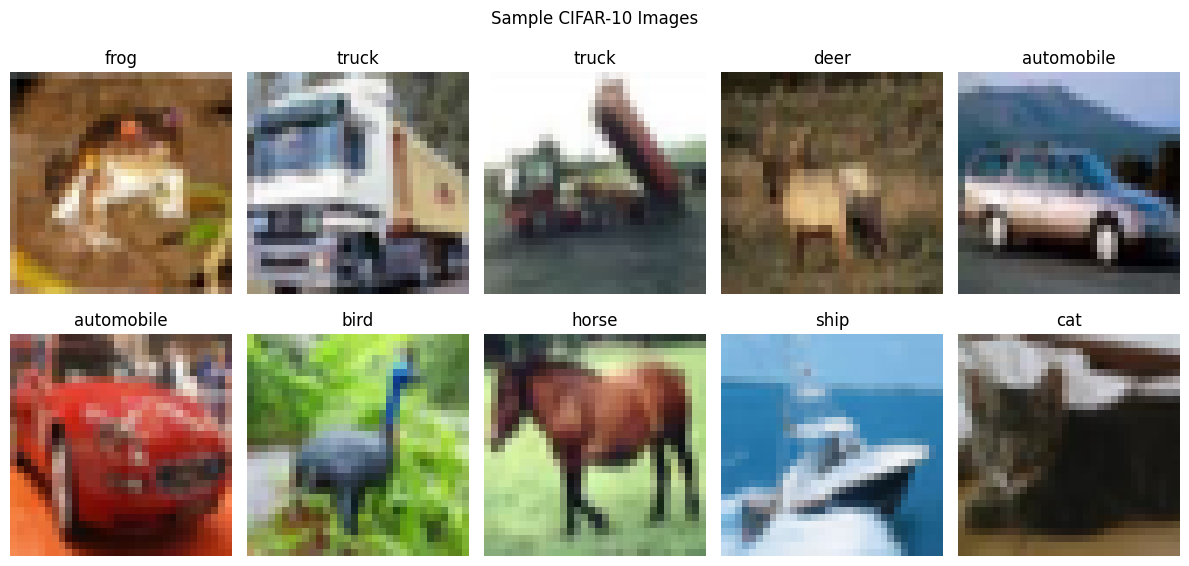

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    ax = axes[i//5, i%5]
    ax.imshow(x_train[i])
    ax.set_title(f'{class_names[y_train[i]]}')
    ax.axis('off')
plt.suptitle('Sample CIFAR-10 Images')
plt.tight_layout()
plt.show()

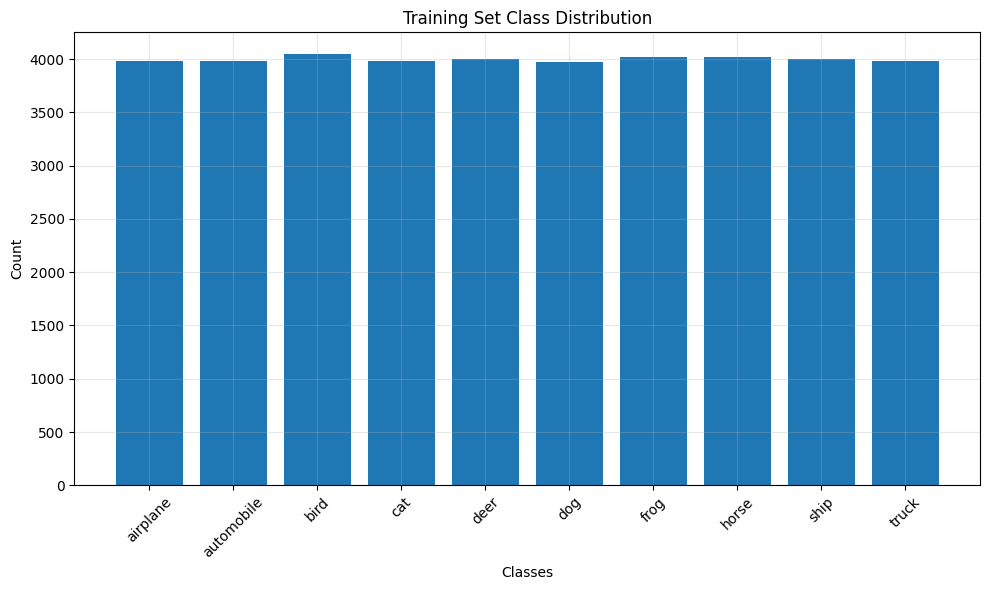

In [7]:
plt.figure(figsize=(10, 6))
unique, counts = np.unique(y_train, return_counts=True)
plt.bar([class_names[i] for i in unique], counts)
plt.title('Training Set Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## CNN Model Keras

In [ ]:
# Individual Model Creation Functions
def create_conv_1layer_model():
    """Create CNN with 1 convolutional layer"""
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), name='conv2d_0'),
        MaxPooling2D((2, 2), name='max_pooling2d_0'),
        Flatten(name='flatten'),
        Dense(128, activation='relu', name='dense_0'),
        Dense(10, activation='softmax', name='dense_output')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

def create_conv_2layers_model():
    """Create CNN with 2 convolutional layers"""
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), name='conv2d_0'),
        MaxPooling2D((2, 2), name='max_pooling2d_0'),
        Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d_1'),
        MaxPooling2D((2, 2), name='max_pooling2d_1'),
        Flatten(name='flatten'),
        Dense(128, activation='relu', name='dense_0'),
        Dense(10, activation='softmax', name='dense_output')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

def create_conv_3layers_model():
    """Create CNN with 3 convolutional layers"""
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), name='conv2d_0'),
        MaxPooling2D((2, 2), name='max_pooling2d_0'),
        Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d_1'),
        MaxPooling2D((2, 2), name='max_pooling2d_1'),
        Conv2D(128, (3, 3), activation='relu', padding='same', name='conv2d_2'),
        MaxPooling2D((2, 2), name='max_pooling2d_2'),
        Flatten(name='flatten'),
        Dense(128, activation='relu', name='dense_0'),
        Dense(10, activation='softmax', name='dense_output')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

def create_filters_small_model():
    """Create CNN with small number of filters (16, 32)"""
    model = Sequential([
        Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), name='conv2d_0'),
        MaxPooling2D((2, 2), name='max_pooling2d_0'),
        Conv2D(32, (3, 3), activation='relu', padding='same', name='conv2d_1'),
        MaxPooling2D((2, 2), name='max_pooling2d_1'),
        Flatten(name='flatten'),
        Dense(128, activation='relu', name='dense_0'),
        Dense(10, activation='softmax', name='dense_output')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

def create_filters_medium_model():
    """Create CNN with medium number of filters (32, 64)"""
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), name='conv2d_0'),
        MaxPooling2D((2, 2), name='max_pooling2d_0'),
        Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d_1'),
        MaxPooling2D((2, 2), name='max_pooling2d_1'),
        Flatten(name='flatten'),
        Dense(128, activation='relu', name='dense_0'),
        Dense(10, activation='softmax', name='dense_output')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

def create_filters_large_model():
    """Create CNN with large number of filters (64, 128)"""
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), name='conv2d_0'),
        MaxPooling2D((2, 2), name='max_pooling2d_0'),
        Conv2D(128, (3, 3), activation='relu', padding='same', name='conv2d_1'),
        MaxPooling2D((2, 2), name='max_pooling2d_1'),
        Flatten(name='flatten'),
        Dense(128, activation='relu', name='dense_0'),
        Dense(10, activation='softmax', name='dense_output')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

def create_kernel_small_model():
    """Create CNN with small kernel size (3x3)"""
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), name='conv2d_0'),
        MaxPooling2D((2, 2), name='max_pooling2d_0'),
        Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d_1'),
        MaxPooling2D((2, 2), name='max_pooling2d_1'),
        Flatten(name='flatten'),
        Dense(128, activation='relu', name='dense_0'),
        Dense(10, activation='softmax', name='dense_output')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

def create_kernel_medium_model():
    """Create CNN with medium kernel size (5x5)"""
    model = Sequential([
        Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(32, 32, 3), name='conv2d_0'),
        MaxPooling2D((2, 2), name='max_pooling2d_0'),
        Conv2D(64, (5, 5), activation='relu', padding='same', name='conv2d_1'),
        MaxPooling2D((2, 2), name='max_pooling2d_1'),
        Flatten(name='flatten'),
        Dense(128, activation='relu', name='dense_0'),
        Dense(10, activation='softmax', name='dense_output')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

def create_kernel_large_model():
    """Create CNN with large kernel size (7x7)"""
    model = Sequential([
        Conv2D(32, (7, 7), activation='relu', padding='same', input_shape=(32, 32, 3), name='conv2d_0'),
        MaxPooling2D((2, 2), name='max_pooling2d_0'),
        Conv2D(64, (7, 7), activation='relu', padding='same', name='conv2d_1'),
        MaxPooling2D((2, 2), name='max_pooling2d_1'),
        Flatten(name='flatten'),
        Dense(128, activation='relu', name='dense_0'),
        Dense(10, activation='softmax', name='dense_output')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

def create_pooling_max_model():
    """Create CNN with max pooling"""
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), name='conv2d_0'),
        MaxPooling2D((2, 2), name='max_pooling2d_0'),
        Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d_1'),
        MaxPooling2D((2, 2), name='max_pooling2d_1'),
        Flatten(name='flatten'),
        Dense(128, activation='relu', name='dense_0'),
        Dense(10, activation='softmax', name='dense_output')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

def create_pooling_avg_model():
    """Create CNN with average pooling"""
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), name='conv2d_0'),
        AveragePooling2D((2, 2), name='average_pooling2d_0'),
        Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d_1'),
        AveragePooling2D((2, 2), name='average_pooling2d_1'),
        Flatten(name='flatten'),
        Dense(128, activation='relu', name='dense_0'),
        Dense(10, activation='softmax', name='dense_output')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

# Model factory function
def create_model_by_name(model_name: str) -> tf.keras.Model:
    """Create model based on name"""
    model_creators = {
        'conv_1layer': create_conv_1layer_model,
        'conv_2layers': create_conv_2layers_model,
        'conv_3layers': create_conv_3layers_model,
        'filters_small': create_filters_small_model,
        'filters_medium': create_filters_medium_model,
        'filters_large': create_filters_large_model,
        'kernel_small': create_kernel_small_model,
        'kernel_medium': create_kernel_medium_model,
        'kernel_large': create_kernel_large_model,
        'pooling_max': create_pooling_max_model,
        'pooling_avg': create_pooling_avg_model
    }
    
    if model_name not in model_creators:
        raise ValueError(f"Unknown model name: {model_name}")
    
    return model_creators[model_name]()

## Training


EXPERIMENT: Number of Layers

Training: conv_1layer


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_0 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_0 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_0 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,050,890 (4.01 MB)

 Trainable params: 1,050,890 (4.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.3932 - loss: 1.6813 - val_accuracy: 0.5547 - val_loss: 1.2716
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.5775 - loss: 1.2056 - val_accuracy: 0.5715 - val_loss: 1.2072
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.6279 - loss: 1.0642 - val_accuracy: 0.6173 - val_loss: 1.1068
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 49s 39ms/step - accuracy: 0.6717 - loss: 0.9449 - val_accuracy: 0.6185 - val_loss: 1.1183
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 37ms/step - accuracy: 0.7008 - loss: 0.8581 - val_accuracy: 0.6234 - val_loss: 1.1033
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 38ms/step - accuracy: 0.7269 - loss: 0.7818 - val_accuracy: 0.6400 - val_loss: 1.0549
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 38ms/step - accuracy: 0.7559 - loss: 0.6913 - val_accuracy: 0.6299 - val_loss: 1.1088
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 51s 41ms/step - accuracy: 0.7847 -

Test Accuracy: 0.6421
Macro F1 Score: 0.6394

Training: conv_2layers


c:\Users\Randy Verdian\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_0 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_0 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_0 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.3973 - loss: 1.6649 - val_accuracy: 0.6008 - val_loss: 1.1425
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.6300 - loss: 1.0624 - val_accuracy: 0.6519 - val_loss: 0.9991
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.6862 - loss: 0.9004 - val_accuracy: 0.6724 - val_loss: 0.9540
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.7229 - loss: 0.7938 - val_accuracy: 0.6671 - val_loss: 0.9637
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.7564 - loss: 0.6929 - val_accuracy: 0.6816 - val_loss: 0.9283
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.7819 - loss: 0.6225 - val_accuracy: 0.6780 - val_loss: 0.9631
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.8127 - loss: 0.5340 - val_accuracy: 0.6711 - val_loss: 1.0256
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.8331 -

c:\Users\Randy Verdian\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6853
Macro F1 Score: 0.6856

Training: conv_3layers


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_0 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_0 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_0 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.3632 - loss: 1.7310 - val_accuracy: 0.6036 - val_loss: 1.1241
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.6227 - loss: 1.0611 - val_accuracy: 0.6895 - val_loss: 0.9069
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 123s 98ms/step - accuracy: 0.6994 - loss: 0.8547 - val_accuracy: 0.6978 - val_loss: 0.8643
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.7470 - loss: 0.7277 - val_accuracy: 0.7055 - val_loss: 0.8589
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7819 - loss: 0.6209 - val_accuracy: 0.7294 - val_loss: 0.7962
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.8177 - loss: 0.5230 - val_accuracy: 0.7247 - val_loss: 0.8263
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 90s 72ms/step - accuracy: 0.8401 - loss: 0.4531 - val_accuracy: 0.7283 - val_loss: 0.8673
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 99s 79ms/step - accuracy: 0.8676 

Test Accuracy: 0.7287
Macro F1 Score: 0.7298


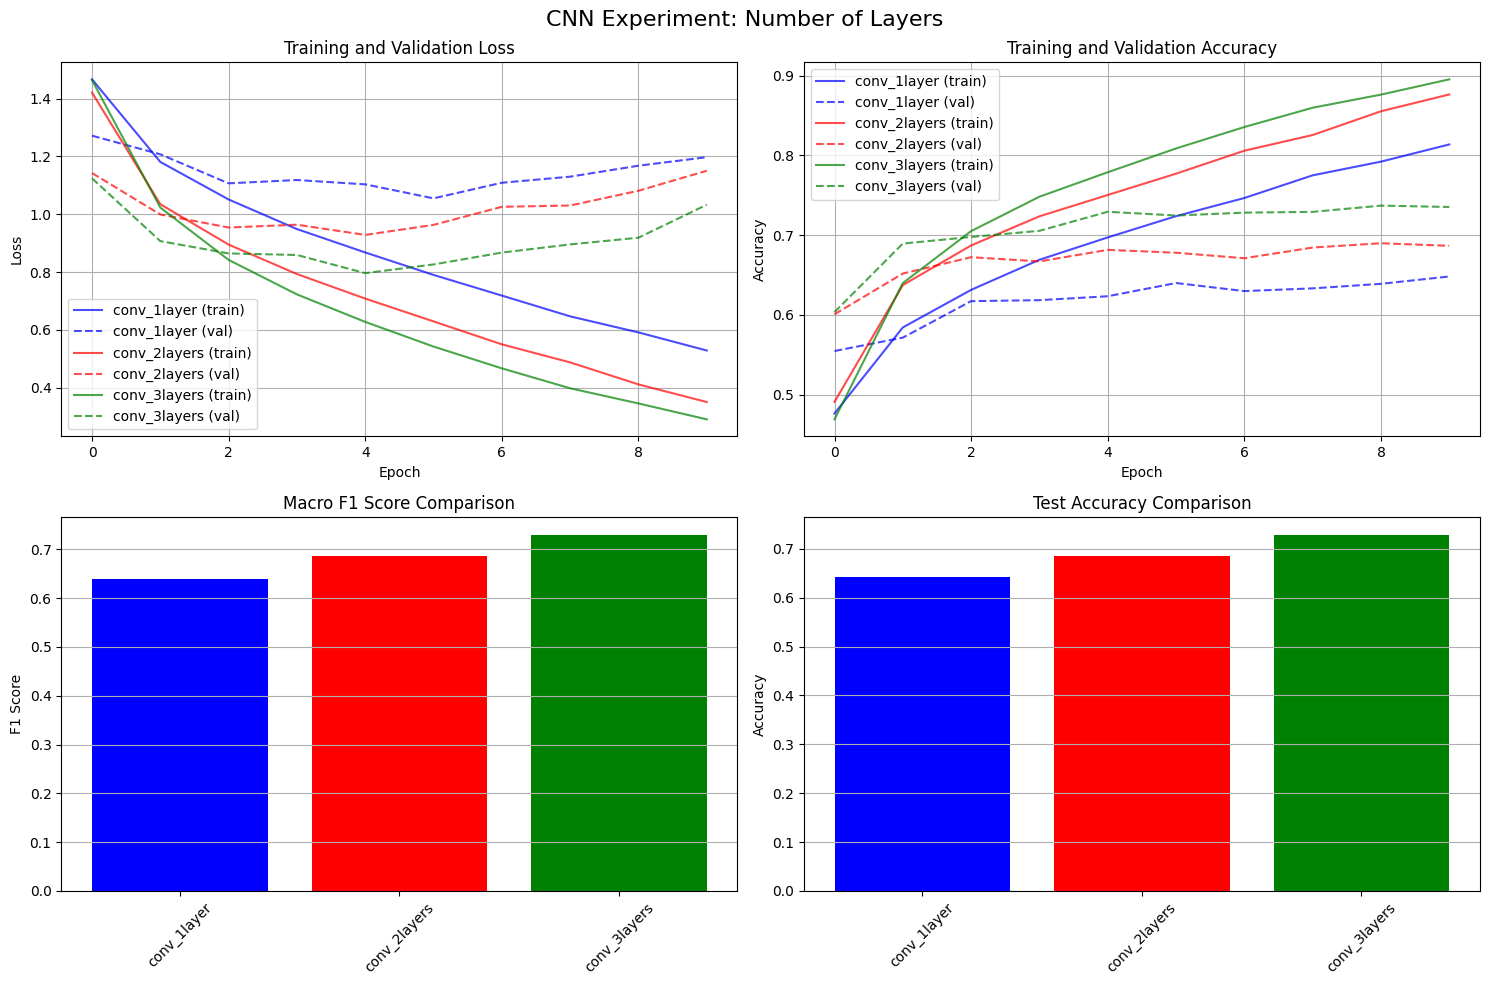


EXPERIMENT: Pooling Type


c:\Users\Randy Verdian\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training: pooling_max


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_0 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_0 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_0 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 73s 55ms/step - accuracy: 0.4015 - loss: 1.6444 - val_accuracy: 0.5806 - val_loss: 1.1950
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 54ms/step - accuracy: 0.6229 - loss: 1.0710 - val_accuracy: 0.6344 - val_loss: 1.0525
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 67s 53ms/step - accuracy: 0.6769 - loss: 0.9131 - val_accuracy: 0.6686 - val_loss: 0.9473
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 71s 57ms/step - accuracy: 0.7155 - loss: 0.8059 - val_accuracy: 0.6830 - val_loss: 0.9187
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 73s 59ms/step - accuracy: 0.7423 - loss: 0.7320 - val_accuracy: 0.6826 - val_loss: 0.9412
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 64ms/step - accuracy: 0.7733 - loss: 0.6496 - val_accuracy: 0.6954 - val_loss: 0.9094
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 98s 78ms/step - accuracy: 0.7964 - loss: 0.5848 - val_accuracy: 0.6985 - val_loss: 0.9203
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.8175 -

c:\Users\Randy Verdian\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6847
Macro F1 Score: 0.6879

Training: pooling_avg


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_0 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_0             │ (None, 16, 16, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 8, 8, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_0 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.3647 - loss: 1.7373 - val_accuracy: 0.5338 - val_loss: 1.3061
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.5632 - loss: 1.2264 - val_accuracy: 0.5865 - val_loss: 1.1711
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.6256 - loss: 1.0562 - val_accuracy: 0.6441 - val_loss: 1.0165
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.6750 - loss: 0.9257 - val_accuracy: 0.6442 - val_loss: 1.0299
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.7025 - loss: 0.8475 - val_accuracy: 0.6733 - val_loss: 0.9450
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.7278 - loss: 0.7710 - val_accuracy: 0.6745 - val_loss: 0.9495
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.7538 - loss: 0.6992 - val_accuracy: 0.6919 - val_loss: 0.9069
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.7778 -

Test Accuracy: 0.6855
Macro F1 Score: 0.6800


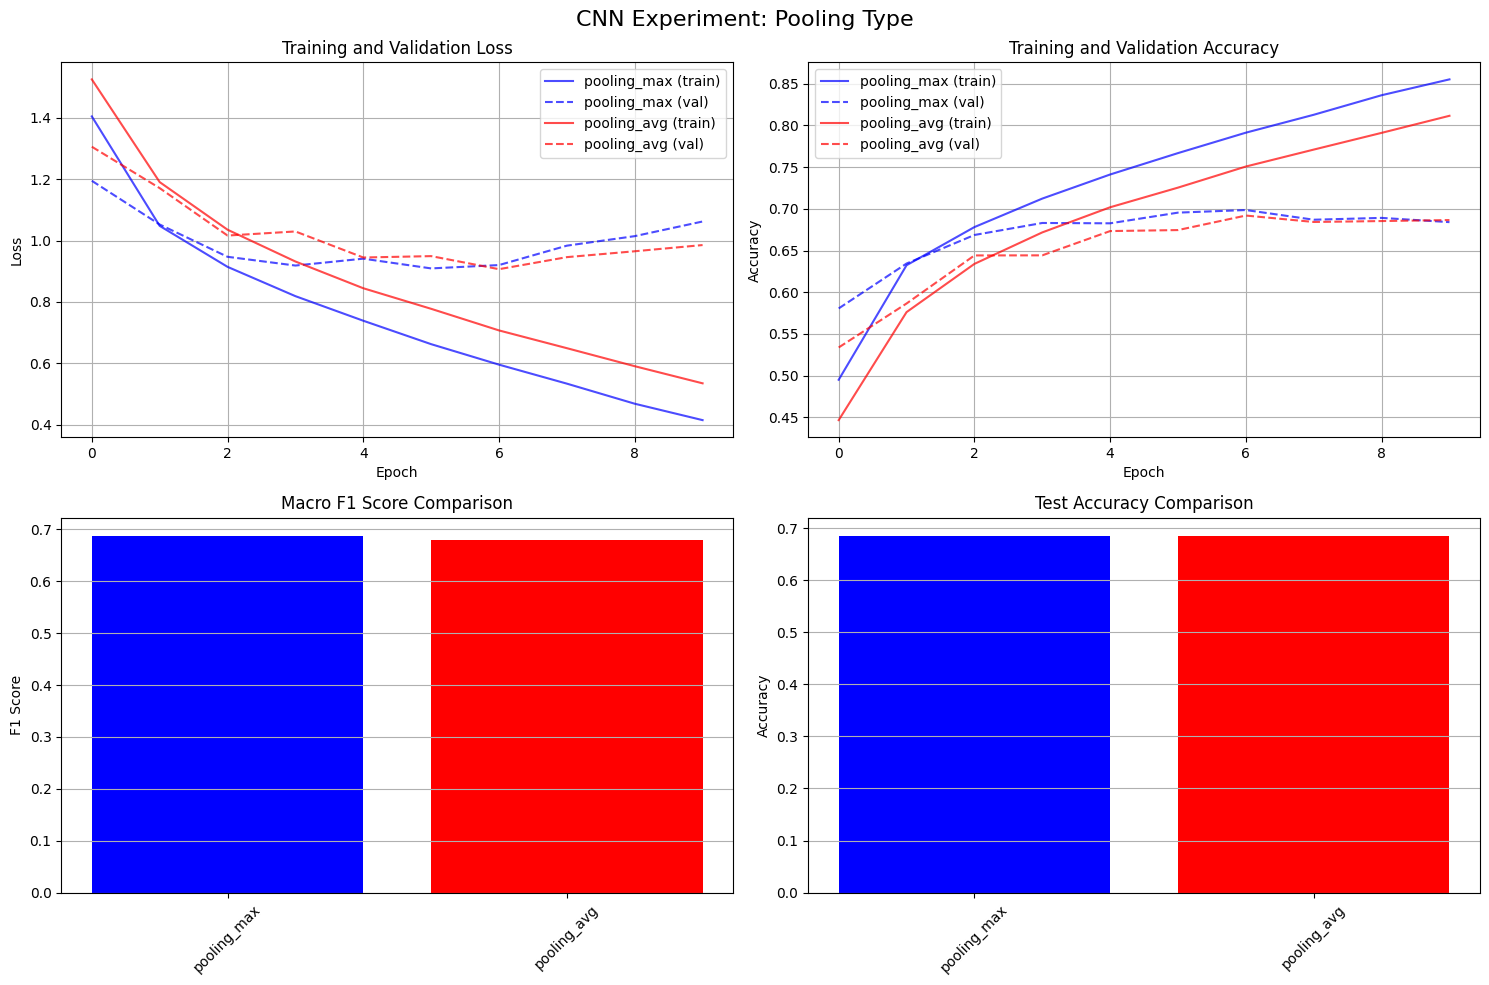


EXPERIMENT: Number of Filters


c:\Users\Randy Verdian\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training: filters_small


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_0 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_0 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_0 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 268,650 (1.02 MB)

 Trainable params: 268,650 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3873 - loss: 1.6968 - val_accuracy: 0.5725 - val_loss: 1.2219
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6006 - loss: 1.1344 - val_accuracy: 0.6148 - val_loss: 1.0940
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6588 - loss: 0.9772 - val_accuracy: 0.6387 - val_loss: 1.0370
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6925 - loss: 0.8769 - val_accuracy: 0.6754 - val_loss: 0.9520
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7222 - loss: 0.8015 - val_accuracy: 0.6594 - val_loss: 0.9806
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7469 - loss: 0.7240 - val_accuracy: 0.6795 - val_loss: 0.9532
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7694 - loss: 0.6534 - val_accuracy: 0.6865 - val_loss: 0.9420
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7905 - loss: 0

c:\Users\Randy Verdian\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6776
Macro F1 Score: 0.6818

Training: filters_medium


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_0 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_0 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_0 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.3874 - loss: 1.6834 - val_accuracy: 0.5943 - val_loss: 1.1507
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.6229 - loss: 1.0642 - val_accuracy: 0.6602 - val_loss: 0.9789
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.6877 - loss: 0.8919 - val_accuracy: 0.6796 - val_loss: 0.9247
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.7251 - loss: 0.7882 - val_accuracy: 0.6862 - val_loss: 0.9248
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.7535 - loss: 0.7036 - val_accuracy: 0.7069 - val_loss: 0.8846
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.7857 - loss: 0.6115 - val_accuracy: 0.7052 - val_loss: 0.9036
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.8100 - loss: 0.5447 - val_accuracy: 0.6901 - val_loss: 0.9781
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.8375 -

c:\Users\Randy Verdian\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6861
Macro F1 Score: 0.6851

Training: filters_large


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_0 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_0 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_0 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125,642 (4.29 MB)

 Trainable params: 1,125,642 (4.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - accuracy: 0.4037 - loss: 1.6543 - val_accuracy: 0.6088 - val_loss: 1.1181
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.6388 - loss: 1.0275 - val_accuracy: 0.6602 - val_loss: 0.9761
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.7015 - loss: 0.8535 - val_accuracy: 0.6780 - val_loss: 0.9259
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.7428 - loss: 0.7299 - val_accuracy: 0.7005 - val_loss: 0.8781
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.7836 - loss: 0.6241 - val_accuracy: 0.7131 - val_loss: 0.8601
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.8138 - loss: 0.5374 - val_accuracy: 0.7062 - val_loss: 0.8958
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.8432 - loss: 0.4471 - val_accuracy: 0.7042 - val_loss: 0.9517
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.8675 -

Test Accuracy: 0.7016
Macro F1 Score: 0.7009


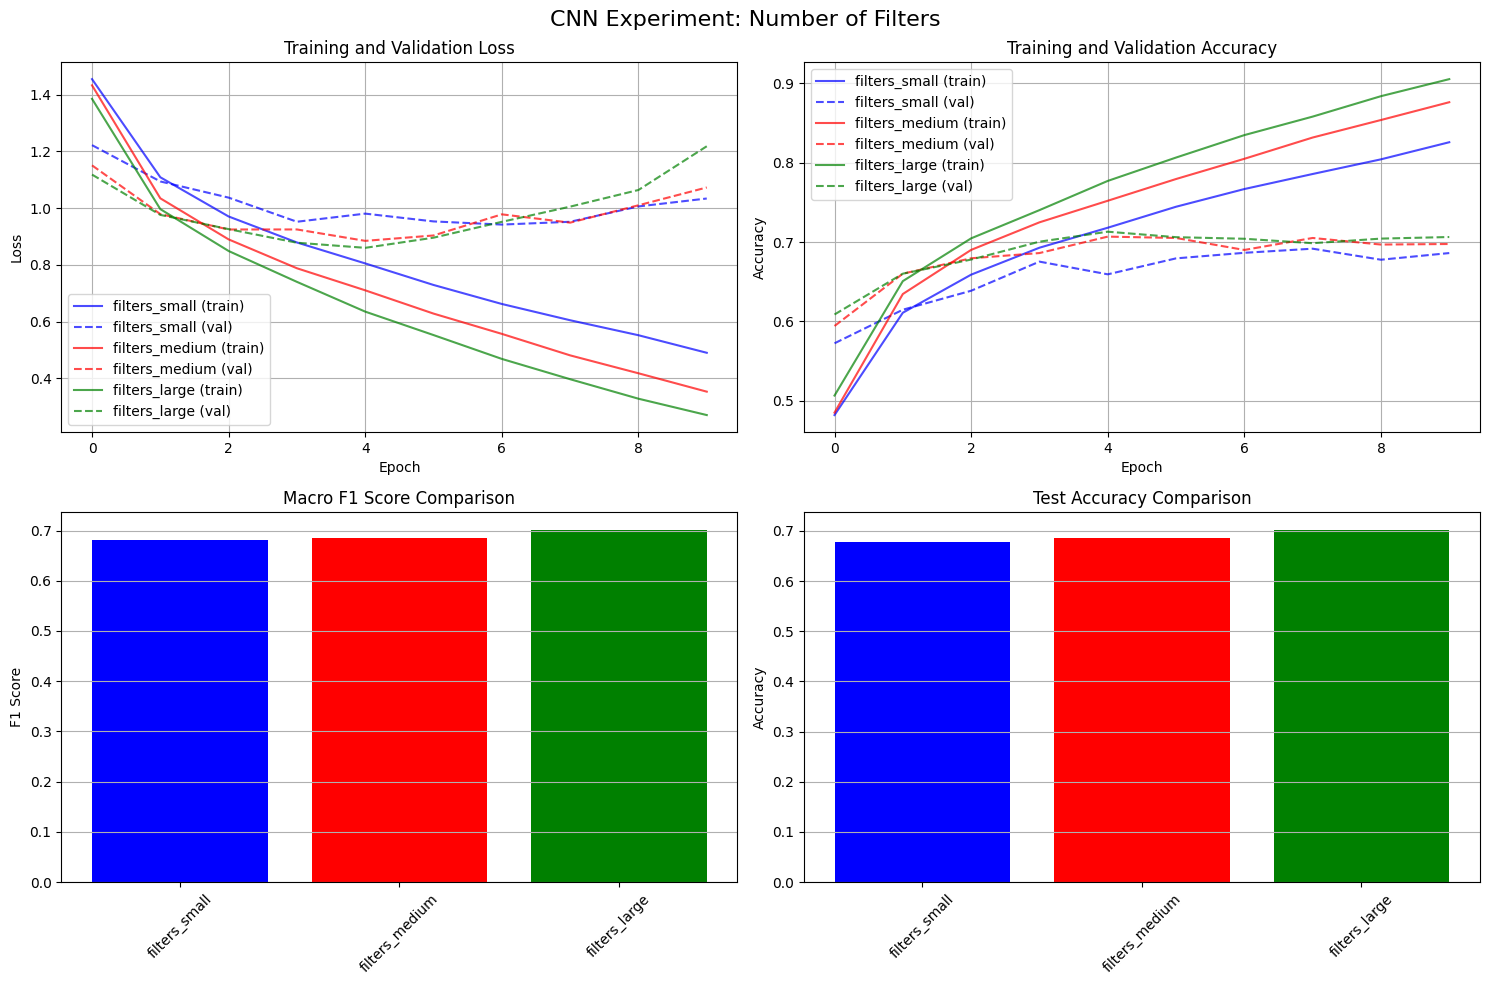


EXPERIMENT: Kernel Size

Training: kernel_small


c:\Users\Randy Verdian\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_0 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_0 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_0 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.3889 - loss: 1.6827 - val_accuracy: 0.6107 - val_loss: 1.1257
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.6247 - loss: 1.0654 - val_accuracy: 0.6528 - val_loss: 1.0019
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.6871 - loss: 0.9060 - val_accuracy: 0.6864 - val_loss: 0.9040
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7184 - loss: 0.7924 - val_accuracy: 0.6948 - val_loss: 0.8971
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.7555 - loss: 0.6951 - val_accuracy: 0.7049 - val_loss: 0.8711
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.7849 - loss: 0.6164 - val_accuracy: 0.6957 - val_loss: 0.8960
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.8094 - loss: 0.5455 - val_accuracy: 0.6939 - val_loss: 0.9516
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.8358 -

c:\Users\Randy Verdian\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.7031
Macro F1 Score: 0.7024

Training: kernel_medium


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_0 (Conv2D)               │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_0 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_0 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 579,402 (2.21 MB)

 Trainable params: 579,402 (2.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 50s 38ms/step - accuracy: 0.3819 - loss: 1.6927 - val_accuracy: 0.5787 - val_loss: 1.1743
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.6051 - loss: 1.1056 - val_accuracy: 0.6357 - val_loss: 1.0345
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.6788 - loss: 0.9228 - val_accuracy: 0.6627 - val_loss: 0.9814
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.7260 - loss: 0.7867 - val_accuracy: 0.6861 - val_loss: 0.9300
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.7618 - loss: 0.6799 - val_accuracy: 0.6886 - val_loss: 0.9085
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.7996 - loss: 0.5829 - val_accuracy: 0.6876 - val_loss: 0.9515
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 36ms/step - accuracy: 0.8270 - loss: 0.4877 - val_accuracy: 0.6888 - val_loss: 1.0015
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.8579 -

Test Accuracy: 0.6823
Macro F1 Score: 0.6823

Training: kernel_large


c:\Users\Randy Verdian\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_0 (Conv2D)               │ (None, 32, 32, 32)     │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_0 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_0 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 630,858 (2.41 MB)

 Trainable params: 630,858 (2.41 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 36ms/step - accuracy: 0.3606 - loss: 1.7488 - val_accuracy: 0.5375 - val_loss: 1.2840
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.5854 - loss: 1.1643 - val_accuracy: 0.6023 - val_loss: 1.1170
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.6607 - loss: 0.9694 - val_accuracy: 0.6343 - val_loss: 1.0702
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 86s 38ms/step - accuracy: 0.7063 - loss: 0.8322 - val_accuracy: 0.6465 - val_loss: 1.0275
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7568 - loss: 0.6943 - val_accuracy: 0.6550 - val_loss: 1.0300
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.8039 - loss: 0.5648 - val_accuracy: 0.6687 - val_loss: 1.0523
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.8398 - loss: 0.4551 - val_accuracy: 0.6600 - val_loss: 1.1835
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.8722 -

Test Accuracy: 0.6484
Macro F1 Score: 0.6485


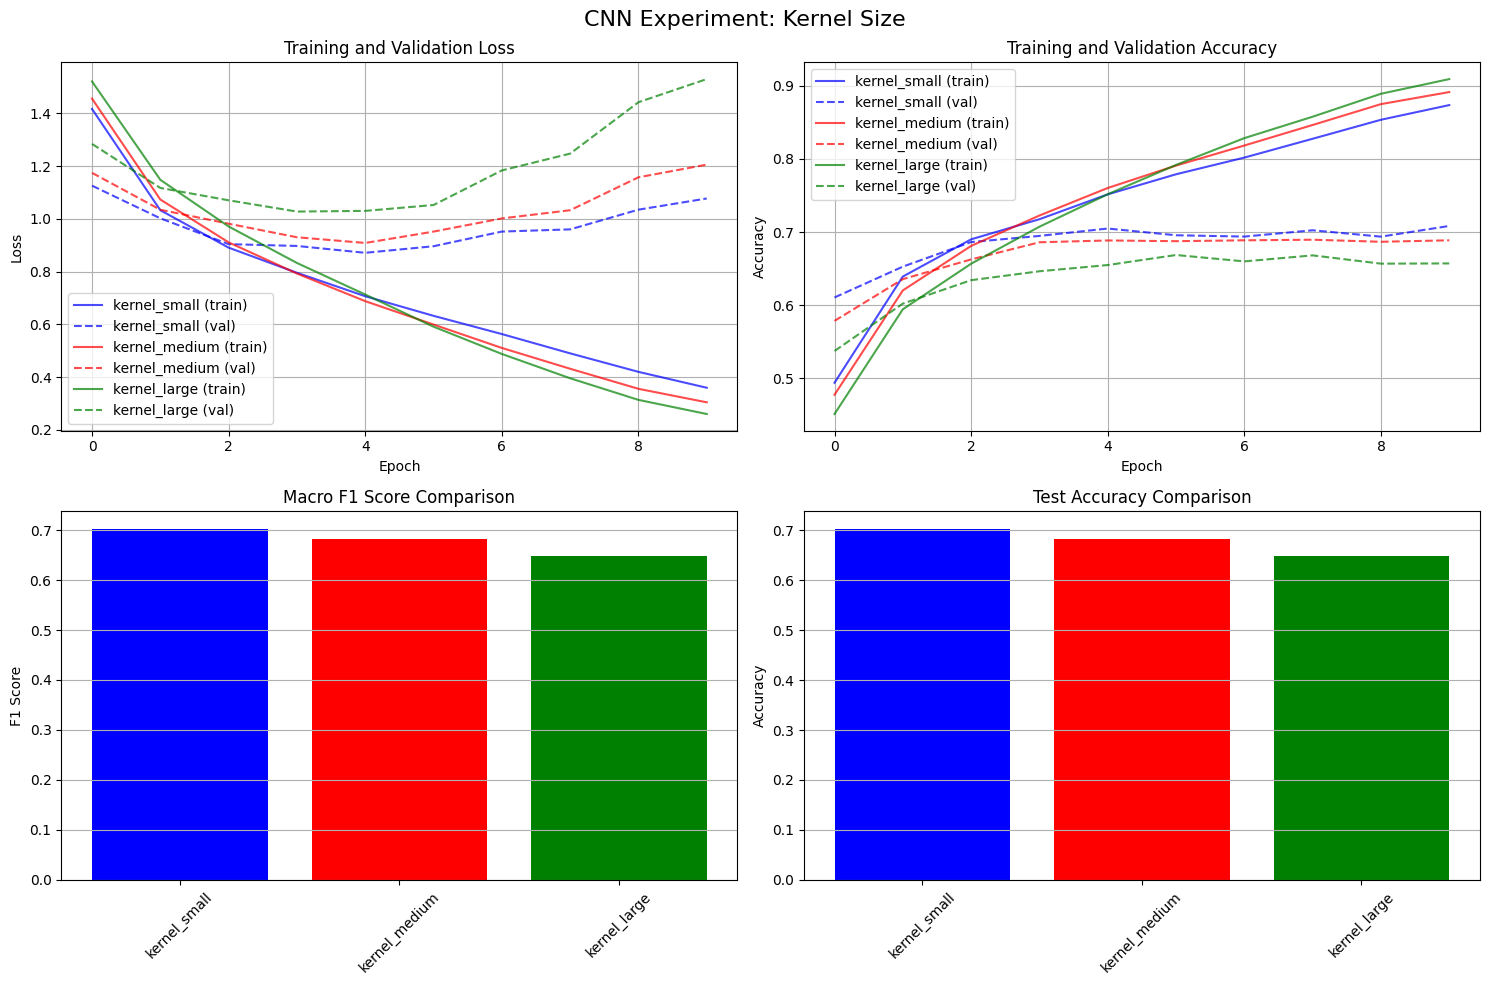


FINAL RESULTS SUMMARY
Model Name           Test Accuracy   Macro F1    
--------------------------------------------------
conv_1layer          0.6421          0.6394      
conv_2layers         0.6853          0.6856      
conv_3layers         0.7287          0.7298      
pooling_max          0.6847          0.6879      
pooling_avg          0.6855          0.6800      
filters_small        0.6776          0.6818      
filters_medium       0.6861          0.6851      
filters_large        0.7016          0.7009      
kernel_small         0.7031          0.7024      
kernel_medium        0.6823          0.6823      
kernel_large         0.6484          0.6485      


In [12]:
selected_experiments = {
    'Number of Layers': ['conv_1layer', 'conv_2layers', 'conv_3layers'],
    'Pooling Type': ['pooling_max', 'pooling_avg'],
    'Number of Filters': ['filters_small', 'filters_medium', 'filters_large'],
    'Kernel Size': ['kernel_small', 'kernel_medium', 'kernel_large']
}

data = (x_train, y_train, x_val, y_val, x_test, y_test)
training_results = {}

for exp_name, model_names in selected_experiments.items():
    print(f"\n{'='*60}")
    print(f"EXPERIMENT: {exp_name}")
    print(f"{'='*60}")
    
    exp_results = {}
    
    for model_name in model_names:
        model = create_model_by_name(model_name)
        
        result = train_and_evaluate_model(model, model_name, data, epochs=10)
        exp_results[model_name] = result
        training_results[model_name] = result
    
    plot_training_history(exp_results, exp_name)

# Print final summary
print(f"\n{'='*60}")
print("FINAL RESULTS SUMMARY")
print(f"{'='*60}")

print(f"{'Model Name':<20} {'Test Accuracy':<15} {'Macro F1':<12}")
print("-" * 50)
for model_name, result in training_results.items():
    print(f"{model_name:<20} {result['test_accuracy']:<15.4f} {result['macro_f1']:<12.4f}")

## Comparison

In [8]:
class CNN_1Layer(CNNModel):
    def __init__(self):
        super().__init__(input_shape=(32, 32, 3), num_classes=10)
        self.add_conv2d(filters=32, kernel_size=(3, 3), padding='same', activation='relu')
        self.add_pooling(pool_size=(2, 2), pool_type='max')
        self.add_flatten()
        self.add_dense(units=128, activation='relu')
        self.add_dense(units=10, activation='softmax')

class CNN_2Layers(CNNModel):
    def __init__(self):
        super().__init__(input_shape=(32, 32, 3), num_classes=10)
        self.add_conv2d(filters=32, kernel_size=(3, 3), padding='same', activation='relu')
        self.add_pooling(pool_size=(2, 2), pool_type='max')
        self.add_conv2d(filters=64, kernel_size=(3, 3), padding='same', activation='relu')
        self.add_pooling(pool_size=(2, 2), pool_type='max')
        self.add_flatten()
        self.add_dense(units=128, activation='relu')
        self.add_dense(units=10, activation='softmax')

class CNN_3Layers(CNNModel):
    def __init__(self):
        super().__init__(input_shape=(32, 32, 3), num_classes=10)
        self.add_conv2d(filters=32, kernel_size=(3, 3), padding='same', activation='relu')
        self.add_pooling(pool_size=(2, 2), pool_type='max')
        self.add_conv2d(filters=64, kernel_size=(3, 3), padding='same', activation='relu')
        self.add_pooling(pool_size=(2, 2), pool_type='max')
        self.add_conv2d(filters=128, kernel_size=(3, 3), padding='same', activation='relu')
        self.add_pooling(pool_size=(2, 2), pool_type='max')
        self.add_flatten()
        self.add_dense(units=128, activation='relu')
        self.add_dense(units=10, activation='softmax')

class CNN_MaxPooling(CNNModel):
    def __init__(self):
        super().__init__(input_shape=(32, 32, 3), num_classes=10)
        self.add_conv2d(filters=32, kernel_size=(3, 3), padding='same', activation='relu')
        self.add_pooling(pool_size=(2, 2), pool_type='max')
        self.add_conv2d(filters=64, kernel_size=(3, 3), padding='same', activation='relu')
        self.add_pooling(pool_size=(2, 2), pool_type='max')
        self.add_flatten()
        self.add_dense(units=128, activation='relu')
        self.add_dense(units=10, activation='softmax')

class CNN_AvgPooling(CNNModel):
    def __init__(self):
        super().__init__(input_shape=(32, 32, 3), num_classes=10)
        self.add_conv2d(filters=32, kernel_size=(3, 3), padding='same', activation='relu')
        self.add_pooling(pool_size=(2, 2), pool_type='average')
        self.add_conv2d(filters=64, kernel_size=(3, 3), padding='same', activation='relu')
        self.add_pooling(pool_size=(2, 2), pool_type='average')
        self.add_flatten()
        self.add_dense(units=128, activation='relu')
        self.add_dense(units=10, activation='softmax')

class CNN_SmallFilters(CNNModel):
    def __init__(self):
        super().__init__(input_shape=(32, 32, 3), num_classes=10)
        self.add_conv2d(filters=16, kernel_size=(3, 3), padding='same', activation='relu')
        self.add_pooling(pool_size=(2, 2), pool_type='max')
        self.add_conv2d(filters=32, kernel_size=(3, 3), padding='same', activation='relu')
        self.add_pooling(pool_size=(2, 2), pool_type='max')
        self.add_flatten()
        self.add_dense(units=128, activation='relu')
        self.add_dense(units=10, activation='softmax')

class CNN_MediumFilters(CNNModel):
    def __init__(self):
        super().__init__(input_shape=(32, 32, 3), num_classes=10)
        self.add_conv2d(filters=32, kernel_size=(3, 3), padding='same', activation='relu')
        self.add_pooling(pool_size=(2, 2), pool_type='max')
        self.add_conv2d(filters=64, kernel_size=(3, 3), padding='same', activation='relu')
        self.add_pooling(pool_size=(2, 2), pool_type='max')
        self.add_flatten()
        self.add_dense(units=128, activation='relu')
        self.add_dense(units=10, activation='softmax')

class CNN_LargeFilters(CNNModel):
    def __init__(self):
        super().__init__(input_shape=(32, 32, 3), num_classes=10)
        self.add_conv2d(filters=64, kernel_size=(3, 3), padding='same', activation='relu')
        self.add_pooling(pool_size=(2, 2), pool_type='max')
        self.add_conv2d(filters=128, kernel_size=(3, 3), padding='same', activation='relu')
        self.add_pooling(pool_size=(2, 2), pool_type='max')
        self.add_flatten()
        self.add_dense(units=128, activation='relu')
        self.add_dense(units=10, activation='softmax')

class CNN_SmallKernel(CNNModel):
    def __init__(self):
        super().__init__(input_shape=(32, 32, 3), num_classes=10)
        self.add_conv2d(filters=32, kernel_size=(3, 3), padding='same', activation='relu')  # Sesuai dengan Keras
        self.add_pooling(pool_size=(2, 2), pool_type='max')
        self.add_conv2d(filters=64, kernel_size=(3, 3), padding='same', activation='relu')  # Sesuai dengan Keras
        self.add_pooling(pool_size=(2, 2), pool_type='max')
        self.add_flatten()
        self.add_dense(units=128, activation='relu')
        self.add_dense(units=10, activation='softmax')

class CNN_MediumKernel(CNNModel):
    def __init__(self):
        super().__init__(input_shape=(32, 32, 3), num_classes=10)
        self.add_conv2d(filters=32, kernel_size=(5, 5), padding='same', activation='relu')  # Sesuai dengan Keras
        self.add_pooling(pool_size=(2, 2), pool_type='max')
        self.add_conv2d(filters=64, kernel_size=(5, 5), padding='same', activation='relu')  # Sesuai dengan Keras
        self.add_pooling(pool_size=(2, 2), pool_type='max')
        self.add_flatten()
        self.add_dense(units=128, activation='relu')
        self.add_dense(units=10, activation='softmax')

class CNN_LargeKernel(CNNModel):
    def __init__(self):
        super().__init__(input_shape=(32, 32, 3), num_classes=10)
        self.add_conv2d(filters=32, kernel_size=(7, 7), padding='same', activation='relu')  # Sesuai dengan Keras
        self.add_pooling(pool_size=(2, 2), pool_type='max')
        self.add_conv2d(filters=64, kernel_size=(7, 7), padding='same', activation='relu')  # Sesuai dengan Keras
        self.add_pooling(pool_size=(2, 2), pool_type='max')
        self.add_flatten()
        self.add_dense(units=128, activation='relu')
        self.add_dense(units=10, activation='softmax')

In [10]:
def compare_models(model_name, test_size=1):
    """
    Compare Keras model with corresponding scratch implementation
    """
    print(f"\nComparing: {model_name}")
    print("-" * 40)
    
    # Load Keras model
    keras_model_path = f'../../models/cnn_{model_name}.h5'
    
    if not os.path.exists(keras_model_path):
        print(f"Model not found: {keras_model_path}")
        return None
    
    print("Loading Keras model...")
    keras_model = tf.keras.models.load_model(keras_model_path)
    
    # Create scratch model based on experiment type
    print(f"Creating scratch model for {model_name}...")
    
    if model_name == 'conv_1layer':
        scratch_model = CNN_1Layer()
    elif model_name == 'conv_2layers':
        scratch_model = CNN_2Layers()
    elif model_name == 'conv_3layers':
        scratch_model = CNN_3Layers()
    elif model_name == 'pooling_max':
        scratch_model = CNN_MaxPooling()
    elif model_name == 'pooling_avg':
        scratch_model = CNN_AvgPooling()
    elif model_name == 'filters_small':
        scratch_model = CNN_SmallFilters()
    elif model_name == 'filters_medium':
        scratch_model = CNN_MediumFilters()
    elif model_name == 'filters_large':
        scratch_model = CNN_LargeFilters()
    elif model_name == 'kernel_small':
        scratch_model = CNN_SmallKernel()
    elif model_name == 'kernel_medium':
        scratch_model = CNN_MediumKernel()
    elif model_name == 'kernel_large':
        scratch_model = CNN_LargeKernel()
    else:
        print(f"Unknown model type: {model_name}")
        return None
    
    # Load weights to scratch model
    print("Loading weights to scratch model...")
    scratch_model.load_keras_weights(keras_model_path)
    
    # Prepare test data
    print(f"Preparing test data (size: {test_size})")
    test_x = x_test[:test_size]
    test_y = y_test[:test_size]
    
    # Get predictions
    print("Getting predictions...")
    keras_proba = keras_model.predict(test_x, verbose=0)
    keras_pred = np.argmax(keras_proba, axis=1)
    
    scratch_proba = scratch_model.predict_proba(test_x)
    scratch_pred = scratch_model.predict(test_x)
    
    # Calculate metrics
    keras_f1 = f1_score(test_y, keras_pred, average='macro')
    scratch_f1 = f1_score(test_y, scratch_pred, average='macro')
    
    print("\nResults:")
    print(f"Keras F1:      {keras_f1:.6f}")
    print(f"Scratch F1:    {scratch_f1:.6f}")
    
    return {
        'model_name': model_name,
        'keras_f1': keras_f1,
        'scratch_f1': scratch_f1,
    }

# Run comparisons
print("Running Implementation Comparisons")
print("=" * 40)

models_to_compare = [
    'conv_1layer',
    'conv_2layers',
    'conv_3layers',
    'pooling_max',
    'pooling_avg',
    'filters_small',
    'filters_medium',
    'filters_large',
    'kernel_small',
    'kernel_medium',
    'kernel_large'
]

comparison_results = {}
successful = 0

for model_name in models_to_compare:
    try:
        result = compare_models(model_name, test_size=1)
        if result:
            comparison_results[model_name] = result
            successful += 1
            print(f"Completed: {model_name} - {result['status']}")
        else:
            print(f"Skipped: {model_name}")
    except Exception as e:
        print(f"Error with {model_name}: {e}")

print(f"\nSummary: {successful}/{len(models_to_compare)} models compared")

Running Implementation Comparisons

Comparing: conv_1layer
----------------------------------------
Loading Keras model...
Creating scratch model for conv_1layer...
Loading weights to scratch model...
Weights loaded from ../../models/cnn_conv_1layer.h5
Preparing test data (size: 1)
Getting predictions...



Results:
Keras F1:      1.000000
Scratch F1:    1.000000
Error with conv_1layer: 'status'

Comparing: conv_2layers
----------------------------------------
Loading Keras model...
Creating scratch model for conv_2layers...
Loading weights to scratch model...
Weights loaded from ../../models/cnn_conv_2layers.h5
Preparing test data (size: 1)
Getting predictions...



Results:
Keras F1:      0.000000
Scratch F1:    0.000000
Error with conv_2layers: 'status'

Comparing: conv_3layers
----------------------------------------
Loading Keras model...
Creating scratch model for conv_3layers...
Loading weights to scratch model...
Weights loaded from ../../models/cnn_conv_3layers.h5
Preparing test data (size: 1)
Getting predictions...


Error with conv_3layers: operands could not be broadcast together with shapes (3,3,64) (3,3,32) 

Comparing: pooling_max
----------------------------------------
Loading Keras model...
Creating scratch model for pooling_max...
Loading weights to scratch model...
Weights loaded from ../../models/cnn_pooling_max.h5
Preparing test data (size: 1)
Getting predictions...



Results:
Keras F1:      0.000000
Scratch F1:    0.000000
Error with pooling_max: 'status'

Comparing: pooling_avg
----------------------------------------
Loading Keras model...
Creating scratch model for pooling_avg...
Loading weights to scratch model...
Weights loaded from ../../models/cnn_pooling_avg.h5
Preparing test data (size: 1)
Getting predictions...



Results:
Keras F1:      0.000000
Scratch F1:    0.000000
Error with pooling_avg: 'status'

Comparing: filters_small
----------------------------------------
Loading Keras model...
Creating scratch model for filters_small...
Loading weights to scratch model...
Weights loaded from ../../models/cnn_filters_small.h5
Preparing test data (size: 1)
Getting predictions...



Results:
Keras F1:      1.000000
Scratch F1:    1.000000
Error with filters_small: 'status'

Comparing: filters_medium
----------------------------------------
Loading Keras model...
Creating scratch model for filters_medium...
Loading weights to scratch model...
Weights loaded from ../../models/cnn_filters_medium.h5
Preparing test data (size: 1)
Getting predictions...



Results:
Keras F1:      1.000000
Scratch F1:    1.000000
Error with filters_medium: 'status'

Comparing: filters_large
----------------------------------------
Loading Keras model...
Creating scratch model for filters_large...
Loading weights to scratch model...
Weights loaded from ../../models/cnn_filters_large.h5
Preparing test data (size: 1)
Getting predictions...



Results:
Keras F1:      1.000000
Scratch F1:    1.000000
Error with filters_large: 'status'

Comparing: kernel_small
----------------------------------------
Loading Keras model...
Creating scratch model for kernel_small...
Loading weights to scratch model...
Weights loaded from ../../models/cnn_kernel_small.h5
Preparing test data (size: 1)
Getting predictions...



Results:
Keras F1:      1.000000
Scratch F1:    1.000000
Error with kernel_small: 'status'

Comparing: kernel_medium
----------------------------------------
Loading Keras model...
Creating scratch model for kernel_medium...
Loading weights to scratch model...
Weights loaded from ../../models/cnn_kernel_medium.h5
Preparing test data (size: 1)
Getting predictions...



Results:
Keras F1:      1.000000
Scratch F1:    1.000000
Error with kernel_medium: 'status'

Comparing: kernel_large
----------------------------------------
Loading Keras model...
Creating scratch model for kernel_large...
Loading weights to scratch model...
Weights loaded from ../../models/cnn_kernel_large.h5
Preparing test data (size: 1)
Getting predictions...

Results:
Keras F1:      1.000000
Scratch F1:    1.000000
Error with kernel_large: 'status'

Summary: 10/11 models compared
